

# Project: Investigate Tmdb-Movies Dataset !

## Contents:
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratoring</a></li>
<li><a href="#conclusions">Conclusions and summary</a></li>
</ul>

<a id='intro'></a>
## Introduction

We all love watching movies !
but unfortunately, many people do not recognize the consumable duration , time , authrizations and budget to cast a  movie onto Platforms and Cinemas.

So, We are going to conclude some certain informaton through TMDb Movies database.


This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
including user ratings , genres , cast , revenue and every possible information about a movie.
In this project, this dataset will go through 3 stages: 
      
      1- Cleaning: which non useful attributes get dropped , Null values get replaced and changing data types of some      
             attributes to make it more useful !
      2- Extracting: appropriate conclusions are going to be extracted from 'Data Frames'.
      3- Visualizing: which those conclusions are going to be visualized to answer some certain questions !
      
      
 

In [1]:
#Imported usefull modules and libraries that are going to be used !
import pandas as pd ,numpy as np ,scipy as sc , seaborn as sns , matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In this section of the report, 

    First -load in the data
    Second-check for cleanliness 
    Third -trim and clean dataset for analysis.
**Each change is followed by specification and declaration.**

===============================================================================

**1-Notes: In this cell, a code is written to have a general view on the dataset!**

===============================================================================


In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


===============================================================================

2- **Notes: In these cells, code is written to provide columns that contains null values using functions 'info' / 'isna'**

===============================================================================


In [3]:
# comparison of number of non-null count and number of total columns is an indicator of an existing null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# True indicates to existince of null values 
df.isna().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

===============================================================================

3-**Notes: in this cell, code is written to check wether duplicates exist or not !**

===============================================================================



In [5]:

sum(df.duplicated())

1


>
### Data Cleaning 

 ===============================================================================================================================
===============================================================================================================================
1-**After observing the sample above, i find that columns having data that clarify something specific is not usefull and need to be dropped.    
( id , imdb_id , cast , homepage , tagline , overview , production_companies , release_date)**

    1- 'id' does not provide any analysis benefits.
    2- 'imdb_id' does not provide any analysis benefits.
    3- 'cast' contains specific data (string) which will not provide any statistical contributions.
    4- 'homepage' does not provide any analysis benefits.
    5- 'overview' genres does provide same data in an effictive and efficient way .
    6- 'tagline' will not provide any effective data.
    7- 'production_companies' contains specific data (string) which will not provide any statistical contributions.
    8- 'release_date' duplication of release_year.
    9- 'keywords' does not provide any helpful data toward answering previously asked questions.
===============================================================================================================================
===============================================================================================================================
   2- **I find that data types are in place and do not need any modification.**

===============================================================================================================================
===============================================================================================================================
   3- **Null values and duplications are going to be removed.  Fields = 0 is replaced with mean.**

===============================================================================================================================
===============================================================================================================================
                                                  
                                                     v
                                                     v


In [6]:

#1-: Dropping unnecessary columns
drop_col = ['id' , 'imdb_id' , 'cast' , 'homepage' , 'tagline' , 'overview' , 'production_companies' , 'release_date' , 'keywords']
df.drop( drop_col , axis = 1 , inplace = True)


In [7]:
#Dataframe after dropping unnecessary columns

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   director        10822 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


================================================================================================================

**3- Removing Null , Duplicated values and Labels containing 'Zero' !**
       
       1- First cell contains code that eliminates all rows that contain a null value !
       2- Second cell contains code that eliminates all duplicated rows !
       3- Third cell contains code that replaces mean in field that contains 'zero !
       
   **Each cell contains both comments and 'info()' to check wether operation completed or not**
   
================================================================================================================


In [8]:
# 3(1/3) -Removing rows that contains null values 

df.dropna(inplace = True)

# Viewing dataframe info to confirm removing 
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10801 non-null  float64
 1   budget          10801 non-null  int64  
 2   revenue         10801 non-null  int64  
 3   original_title  10801 non-null  object 
 4   director        10801 non-null  object 
 5   runtime         10801 non-null  int64  
 6   genres          10801 non-null  object 
 7   vote_count      10801 non-null  int64  
 8   vote_average    10801 non-null  float64
 9   release_year    10801 non-null  int64  
 10  budget_adj      10801 non-null  float64
 11  revenue_adj     10801 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


================================================================================================================

In [9]:

# 3(2/3)-Removing Duplicated rows !
df.drop_duplicates(inplace = True)

#Viewing dataframe info to confirm removing
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10800 non-null  float64
 1   budget          10800 non-null  int64  
 2   revenue         10800 non-null  int64  
 3   original_title  10800 non-null  object 
 4   director        10800 non-null  object 
 5   runtime         10800 non-null  int64  
 6   genres          10800 non-null  object 
 7   vote_count      10800 non-null  int64  
 8   vote_average    10800 non-null  float64
 9   release_year    10800 non-null  int64  
 10  budget_adj      10800 non-null  float64
 11  revenue_adj     10800 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.1+ MB


================================================================================================================

#3(3/3) -Replacing zero with mean !

for example, i will take 'budget' as a clarification.



In [10]:
df['budget'].describe()

count    1.080000e+04
mean     1.471114e+07
std      3.098677e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.564374e+07
max      4.250000e+08
Name: budget, dtype: float64

as we can see above ^ min equals zero.

In [11]:
# *NOTE* This code replaces zero with mean for all selected columns !

#Those columns are selected based on their benefits at visualization part of this projct !

label = [ 'runtime' ,'budget' , 'revenue']
x = 0
for i in label:
    if type(label[x]) is int :
     df[label[x]].replace(0 , int (df[label[x]].mean()) , inplace = True)
     x+=1
    else:
     df[label[x]].replace(0, df[label[x]].mean(), inplace=True)
     x+=1
        
#Now after replacing zero's with mean, we're going to have a look at 'min' for budget to make sure the code works well !   
df['budget'].describe()



count    1.080000e+04
mean     2.238817e+07
std      2.807649e+07
min      1.000000e+00
25%      1.471114e+07
50%      1.471114e+07
75%      1.564374e+07
max      4.250000e+08
Name: budget, dtype: float64

In [12]:


# 'runtime'

df['runtime'].describe()



count    10800.000000
mean       102.454659
std         30.339749
min          2.000000
25%         90.000000
50%         99.000000
75%        111.250000
max        900.000000
Name: runtime, dtype: float64

In [13]:


# 'revenue'

df['revenue'].describe()



count    1.080000e+04
mean     6.214616e+07
std      1.113169e+08
min      2.000000e+00
25%      4.006558e+07
50%      4.006558e+07
75%      4.006558e+07
max      2.781506e+09
Name: revenue, dtype: float64

================================================================================================================


#### As we finished wrangling and cleaning TMDb-Movies Dataset we condlude the following :
    1- 65 rows have been eliminated due to containing Null Values.
    2- 1 row have been eliminated due to duplication.
    3- 66 rows eliminated in total. 
    4- 9 columns gotten dropped due to lack of contribution to analysis and effectivness.
================================================================================================================


<a id='eda'></a>
## Exploratory Data Analysis 
### Three questions :  1 , 2(1-2-3) , 3


# Question 1: has number of votes been considerable since 1960 ?

<AxesSubplot:xlabel='release_year', ylabel='vote_count'>

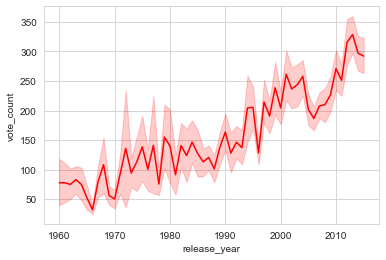

In [86]:



sns.lineplot(data=df,x= 'release_year' , y="vote_count", markers=True, dashes=False, ci=70 , color = 'red')


# Quesiton 1 answer :

#### *As the graph shows, Vote number has been significantly rising since 1960 which leads to this: Yes vote number is getting considerable since it's significantly rising.*


========================================================================================================================

========================================================================================================================
# Question 2

### Analysis On Top five revenue movies !

    These are questions under Question number 2 and are going to be answered at the end.

    1-Question 2(1/3):  What's the difference between Top move's revenue and second Top movie ?
    
    2-Question 2 (2/3): Which Movie from the top five has achieved max profit ? max(revenue - budget)
    
    3-Question 2 (3/3): Does Long runtime affect popularity  ? 

========================================================================================================================


### At first I will create a seperate Dataframe for this question to make it easier for me to make changes ! 

In [44]:
#First i am going to get the top five revenues by casting 'revenue' columns from dataframe into a list 

#casting !
revlist = list(df['revenue'])

dirlist = list(df['director'])


otlist = list(df['original_title'])


rtlist = list(df['runtime'])

budglist = list(df['budget'])

poplist = list(df['popularity'])

#list of revenue values !
revenuelist = []

#List of top five : directors, runtime , original title , etc.. !
directorlist = []

runtimelist = []

original_titlelist = []

budgetlist = []

popularitylist = []

#list of indexes that are going to be gathered from down below and filled in this list
loindex = []

index = 0

while index < 7:

    if  index == 2 :
        temp = max(revlist)
        revlist.remove(temp)
        index += 1

    if  index == 3:
        temp = max(revlist)
        revlist.remove(temp)
        index += 1



    else:
        temp = max(revlist)
        revenuelist.append(temp)
        print(temp)
        print(revlist.index(temp))
        loindex.append(revlist.index(temp))
        revlist.remove(temp)
        index += 1




#Results down below represents the top five highest revenue movies!

2781505847.0
1375
2068178225.0
3
1513528810.0
0
1506249360.0
2
1405035767.0
11


In [45]:

#Now i'll print the top 5 movie revenues directors with their respective index saved in 'liondex' 
ind = 0
while ind < 5:
    directorlist.append(dirlist[loindex[ind]])
    original_titlelist.append(otlist[loindex[ind]])
    runtimelist.append(rtlist[loindex[ind]])
    budgetlist.append(budglist[loindex[ind]])
    popularitylist.append(poplist[loindex[ind]])
    print(ind + 1, '-', 'Name of director:', dirlist[loindex[ind]], '\n index^:', loindex[ind], '\n--------------')
    ind += 1



1 - Name of director: James Cameron 
 index^: 1375 
--------------
2 - Name of director: J.J. Abrams 
 index^: 3 
--------------
3 - Name of director: Colin Trevorrow 
 index^: 0 
--------------
4 - Name of director: Robert Schwentke 
 index^: 2 
--------------
5 - Name of director: Lana Wachowski|Lilly Wachowski 
 index^: 11 
--------------


### Now, Let's visualize the results from above !

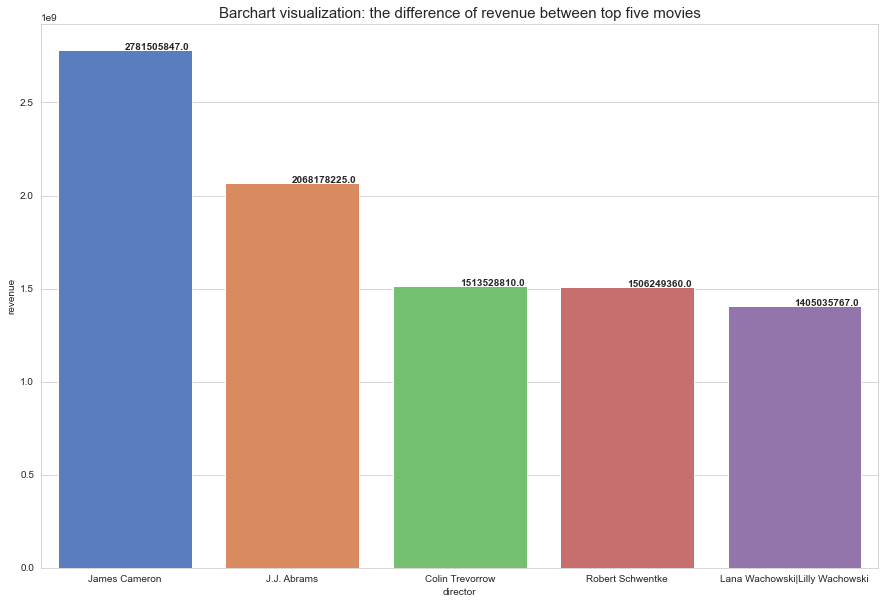

In [46]:
#Let's make a temporary dataframe for this question !

#Dictionary holds both data from above
alldic = {
    'director' : directorlist,
    'revenue'  : revenuelist,
    'budget'  : budgetlist,
    'runtime' : runtimelist,    
    'original_title' : original_titlelist,
    'popularity'  : popularitylist
    
}

#Dataframe : df1
df1 = pd.DataFrame(alldic , columns=['director' , 'revenue', 'budget' , 'runtime', 'original_title' , 'popularity'])

#data : data used in visualization
data = df1

#From imported libraries above , I've used seaborn to visualize the results!
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(15,10))

ax = sns.barplot(data=data, x=data['director'], y= data['revenue'], ci=None, palette="muted",orient='v', )
ax.set_title("Barchart visualization: the difference of revenue between top five movies", fontsize=15)
ax.set_xlabel ("director")
ax.set_ylabel ("revenue")

#adding values to it's correct bar respectively 
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(), rect.get_height(), weight='bold' )

    
#EXPLANATION: 1e9 stands for 2 * 10^9

### Same bar chart above but x-axis is changed to movie name (Original_title)

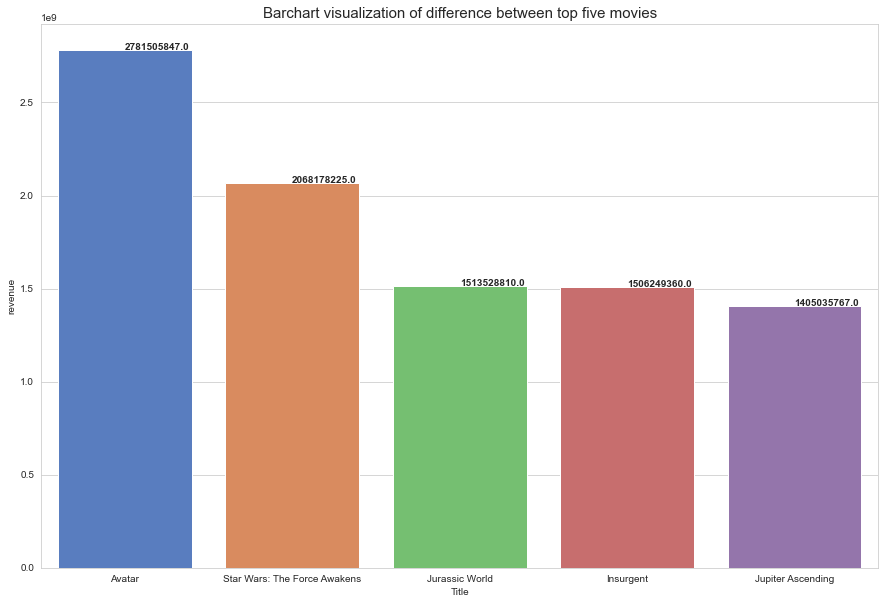

In [47]:

sns.set_style("whitegrid")
bar,ax1 = plt.subplots(figsize=(15,10))
ax1 = sns.barplot(data=data, x=data['original_title'], y= data['revenue'], ci=None, palette="muted",orient='v', )
ax1.set_title("Barchart visualization of difference between top five movies", fontsize=15)
ax1.set_xlabel ("Title")
ax1.set_ylabel ("revenue")

#adding values to its bar 
for rect in ax1.patches:
    ax1.text (rect.get_x() + rect.get_width() / 2,rect.get_height(), rect.get_height(), weight='bold' )

#EXPLANATION: 1e9 stands for 2 * 10^9

=============================================================================================
## Question 2(1/3): What's the difference between Top movie's revenue and second Top movie ?

In [48]:
#Conclusion #1: difference between top and second movies revenue
maxrevdif = revenuelist[0] - revenuelist[1]
print(maxrevdif)

713327622.0


## Question 2 (2/3): Which Movie from the top five has achieved max profit ? max(revenue - budget)



Note: This questions contains two graphs: 
    
    1-Normal Barplot of budget/movie  - for general view
    2-Double Barplot of revenue-budget / movie - for calculation 

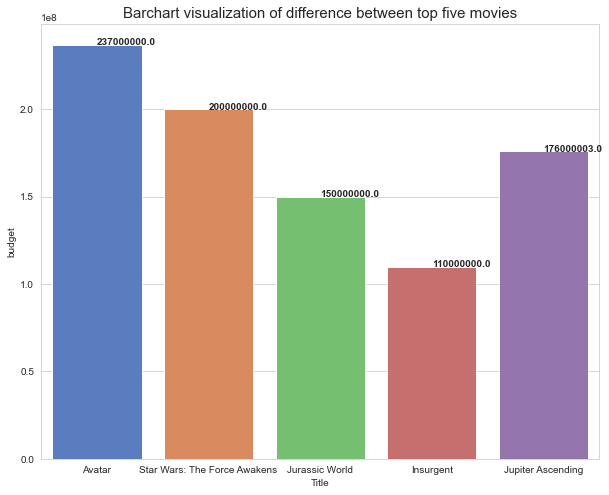

In [49]:
sns.set_style("whitegrid")
bar,ax1 = plt.subplots(figsize=(10,8))
ax1 = sns.barplot(data=data, x=data['original_title'], y= data['budget'], ci=None, palette="muted",orient='v', )
ax1.set_title("Barchart visualization of difference between top five movies", fontsize=15)
ax1.set_xlabel ("Title")
ax1.set_ylabel ("budget")

#adding values to its correct bar respectively
for rect in ax1.patches:
    ax1.text (rect.get_x() + rect.get_width() / 2,rect.get_height(), rect.get_height(), weight='bold' )
    

#Graph number 1

## Let's observe the difference and conclude !

Text(0, 0.5, 'budget')

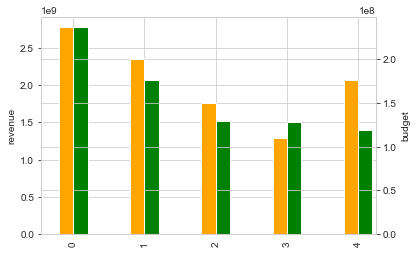

In [50]:
#This dictionary includes only title of movie , revenue and it's budget to help us visualize our question.
sundic = {
    'title' : original_titlelist,
    'revenue' : revenuelist,
    'budget'  : budgetlist

}


#df3 , a dataframe made by pandas 
df3 = pd.DataFrame(data = data , columns= ['original_title' , 'revenue' , 'budget'])

#initialize the figure
figure = plt.figure()

#ax , ax2 are both axes for this figure and it was possible because of 'twinx()' function.
ax = figure.add_subplot(111)
ax2 = ax.twinx()

width = 0.2

#Let's plot the figure with data
df3.revenue.plot(kind='bar', color='green', ax=ax, width=width, position=0)
df3.budget.plot(kind='bar', color='orange', ax=ax2, width=width, position=1)
ax.set_ylabel('revenue')
ax2.set_ylabel('budget')

#Graph number 2

#Note that each bar is represented by an index which refers:  0 : first top movie , 1 : second top move and so on..

## Now let's calculate the difference between revenue and budget of each move !
Since we know the index of each movie, it's now easy to calculate it !

In [59]:
#list contains profit of all top(revenue) five movies
maxprofitlist = []

#Loop to calculate the difference
for i in range(5):
    maxprofitlist.append(revenuelist[i] - budgetlist[i])
    print(i+1,'-Movie Title :' , original_titlelist[i] , ' | Director:' , directorlist[i]   ,'\nProfit:', revenuelist[i] - budgetlist[i])
    print('\n=================================')
    
#saves highest value in a variable
maxprofit = max(maxprofitlist)

#index of the highest variable
maxprofitindex = maxprofitlist.index(maxprofit)

print('Max profit(revenue-budget) movie between the top five is   "' , original_titlelist[maxprofitindex] , '"  with max profit = ', maxprofit)

1 -Movie Title : Avatar  | Director: James Cameron 
Profit: 2544505847.0

2 -Movie Title : Star Wars: The Force Awakens  | Director: J.J. Abrams 
Profit: 1868178225.0

3 -Movie Title : Jurassic World  | Director: Colin Trevorrow 
Profit: 1363528810.0

4 -Movie Title : Insurgent  | Director: Robert Schwentke 
Profit: 1396249360.0

5 -Movie Title : Jupiter Ascending  | Director: Lana Wachowski|Lilly Wachowski 
Profit: 1229035764.0

Max profit(revenue-budget) movie between the top five is   " Avatar "  with max profit =  2544505847.0


## Question 2 (3/3):  Is runtime of top five highest revenue movies amoung the %75 of overall runtime ? 


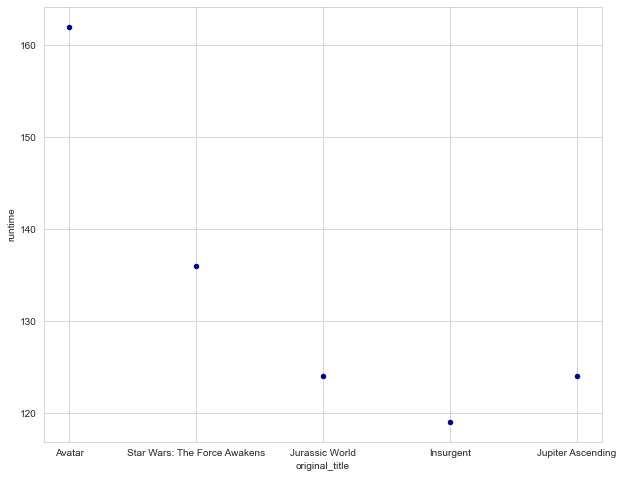

In [95]:
ax3 = df1.plot.scatter(x='original_title',  y='runtime', c='DarkBlue' , figsize = (10,8))

#Note that runtime is in minutes

# 1 hour = 60 minutes , 2 hours = 120 and so on..

In [96]:
df['runtime'].describe()

count    10800.000000
mean       102.454659
std         30.339749
min          2.000000
25%         90.000000
50%         99.000000
75%        111.250000
max        900.000000
Name: runtime, dtype: float64

## (Question 2) We can conclude the following:

Answer of each Question asked above !:
   
    1/3-'Avatar' movie's revenue is above the second top movie 'Star Wars: The Force 'Awakens' by $713,327,622 
    
    2/3- max(revenue - budget) : 'Avatar' Movie with max profit : $2544505847.0
   
    3/3- No, The lowest runtime amoung top five highest revenue movies is 118 minutes which is higher than 75% of overall                 runtime which is 111 minutes
    
  
### ====================================================================================================================================
       
    
  

# Question 3 : Does runtime increase or decrease since 1960 ?

<AxesSubplot:xlabel='release_year', ylabel='runtime'>

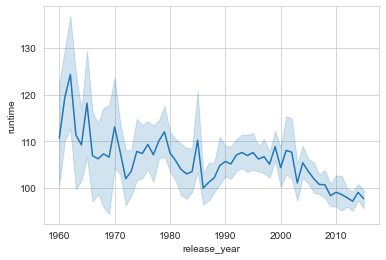

In [116]:
#This lineplot by seaborn shows how runtime took over years
data = df
sns.lineplot( data=data  ,x="release_year", y="runtime",)


## Question 3 Answer :

### As the figure show , Runtime started at '110' minute and stopped approximately at '70' minutes

1960 - 1970 : Runtime had extreme up and down for about 5 times (3 up points and 2 down points)

1970-1980: Runtime had continued turning down until approximately 1972 , after that it went up until 1979. After 1979 it         started turning down again.

1980-1990: followed at the end of 1980, Runtime went turning down until mids of this decade, After that it raised up and immediately turned down to '100'minutes which is considered as the lowest runtime ever since 1960, after this drop it went back raising.

1990-2000: followed by last decade, runtime was significally raising till the end of this decade, it dropped a little bit.

2000-2015: first of this decate, runtime line was unstable until 2003/2004 which then runtime was turning down at stable form.

## Answer: As graph represents, runtime has decreased with a margin '-40' minutes .


<a id='conclusions'></a>
## Conclusions

In conclustion, This dataset had compelling number of things  replaced , removed or kept. But the mostly 'nan' values was the most dropped. I replaced zero values by mean value to have correct analysis then relized pandas do not take zero value in cosideration.

I analyzed and plotted in two ways:
    
    1- General: By taking release_year as independent variable and measured runtime , vote_count on it.
    
    2- Specific: By analyzing the top five highest revenues movies and answering three questions.
 
At first i will talk about general analysis. Votecount is significally rising since 1960 because in my opinion, movies industry has taken a big role in a lot of countries economy such as Hollywood in USA. Since Movie industry has a enormous fanbase; quality of production gotten elevated by the competence of production companies, Hence vote count at 2015 excessed 1960 by margin equals +215. Moreover, runtime also decreased by margin equals -40 minutes with standard 122 minutes per movie.


Second specific analysis, i analyzed the top five highest revenue movie and gotten with the following; The top highest revenue move-'Avatar'- is higher than the second top by 713327622 Dollars The max profit(revenue minus budget) amoung the top five highest revenue is also 'Avatar' Movie with profit equals  2544505847 Dollars. Moreover , Runtime of the top five highest revenue movies is higher than 75% of movies in this dataset.



*Limitations:* 
I faced a lot of dead ends but fortunately found a solution. 

First i had taken a lot of time to get the top five highest revenue movies and to make sure that they are indeed the top five. 

Second, i had a trouble in plotting the double bar in question number 2 (2/3), unfortunately it took a lot of my time but the end i solved it !

third, I noticed that there are significant number of duplicates amoung each column, in fact most of my time was on figuring what to do about question 2 (2/3), since two movies amoung the top five had duplicated budget 
equals = 147*** ( I don't remember the whole number). but luckely i found a solution by jumping those two movies and eliminating them from the comparison. I could not remove all duplicated amoung each column because the overall rows will down rocket from 8000 rows to 3000 which is not realistic.


At the end, i would like to thank Udacity for this interesting project,
I really enjoyed each part of this project.


 ====================================================*TheEND*==================================================================